# Beam Propagation Method: XZ 

For Rayleigh-Sommerfeld approach, masks are considered using Thin Element Approximation (TEA), that is, they are infinitely thin. This can be useful in many situations, but does not allow determining the field inside elements.

With Beam Propagation Method, we define an XZ plane with a background index (n=1 for vaccum, for example) and insert optical elements considering its shape and refraction index. We also need to include the input scalar field and propagate. Since the field is computed sequentially, no multiprocessing is possible for determining the u(x,z) field in monocromatic, single field. 

One disventage of this technique is that no reflections are considered, although perhaps they can be included in the future.

## Simple case: sphere
In this first case, we insert an sphere of index $n=1.5$ and propagates.

In [1]:
from diffractio import degrees, mm, plt, sp, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

from diffractio.scalar_masks_XZ import Scalar_mask_XZ

%matplotlib inline  

# size of figures
import matplotlib
matplotlib.rcParams['figure.figsize']=(16,8)

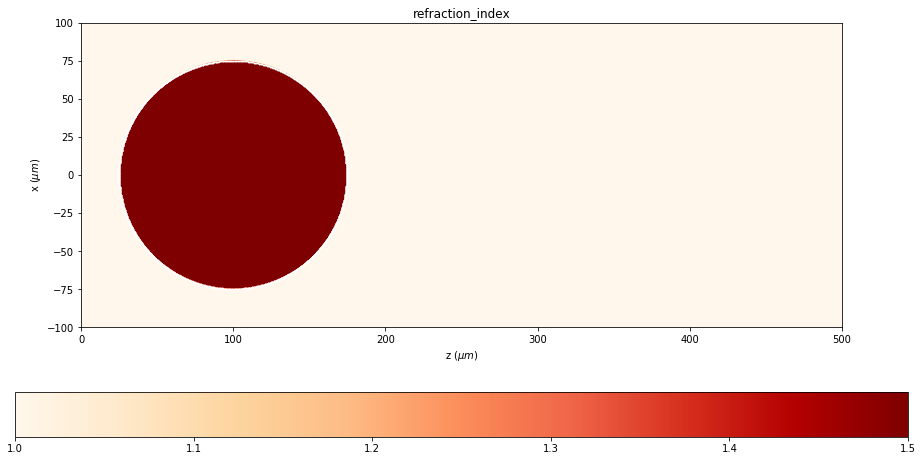

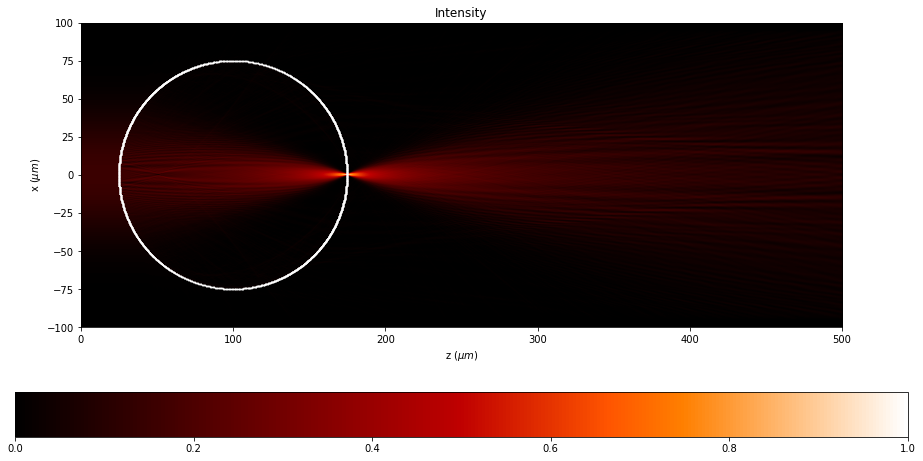

In [2]:
# Initial parameters
x0 = sp.linspace(-100 * um, 100 * um, 2048)
z0 = sp.linspace(0 * um, 500 * um, 2048)
wavelength = 0.6238 * um

radius_sphere = 75 * um

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=50 * um, theta=0. * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)  # insert field

# insert sphere
u1.sphere(
    r0=(0, 100 * um),
    radius=(radius_sphere, radius_sphere),
    refraction_index=1.5)

# draw refraction index
u1.draw_refraction_index(scale='scaled')

# BPM propagation 
u1.BPM(verbose=False)

# draw results
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')
plt.show()

## Rochi grating

z=350.0,-300.0
r=250.0,-500.0


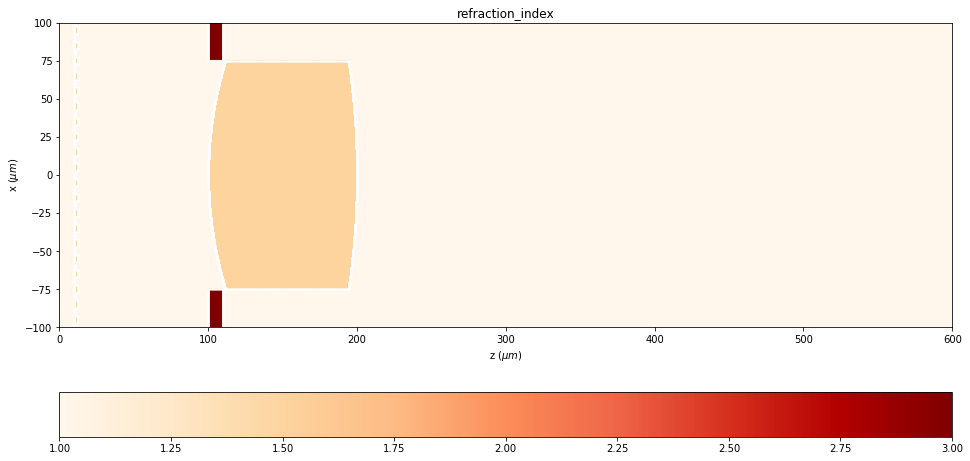

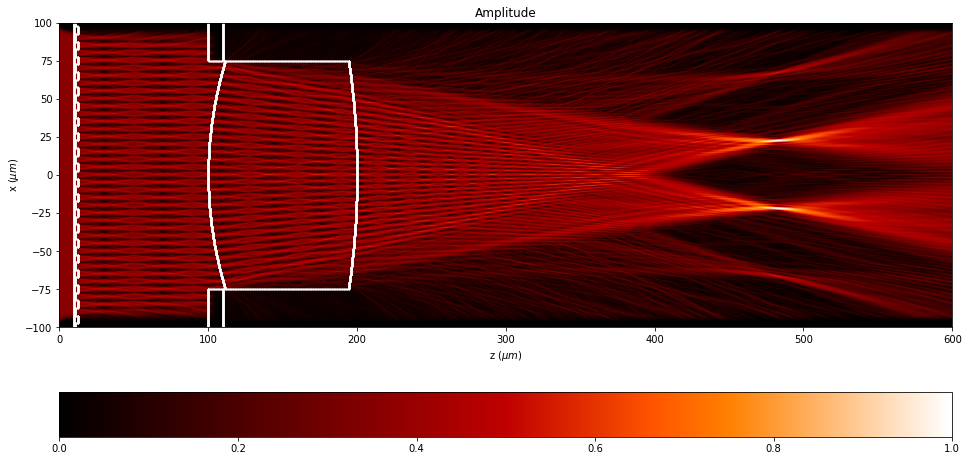

In [4]:
x0 = sp.linspace(-100 * um, 100 * um, 4096)
z0 = sp.linspace(0 * um, 600 * um, 4096)
wavelength = .6328 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)

u1.lens_convergent(
    r0=(0 * um, 100 * um),
    aperture=150 * um,
    radius=(250 * um, -500 * um),
    thickness=100 * um,
    refraction_index=1.5,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))

height_grating = (1.5 - 1) * wavelength * 2
u1.ronchi_grating(
    period=10 * um,
    fill_factor=0.5,
    length=5 * mm,
    height=2 * um,
    r0=(0 * um, 10 * um),
    Dx=0 * um,
    refraction_index=1.5,
    heigth_substrate=height_grating,
    refraction_index_substrate=1.5,
    angle=0 * degrees)

u1.draw_refraction_index()
u1.BPM(verbose=False)
u1.draw(kind='amplitude', logarithm=True, draw_borders=True)

## Limits of beam propagation method
One of the limits of Beam Propagation method is the resolution in the grid of x,z. If the grid is not enough, for example, in a phase mask like a lens, the shape is not considered continuous but with edges. In this case, edges produce a discontinuity that proagates.

z=1000.0,-150.0
r=1000.0,-250.0


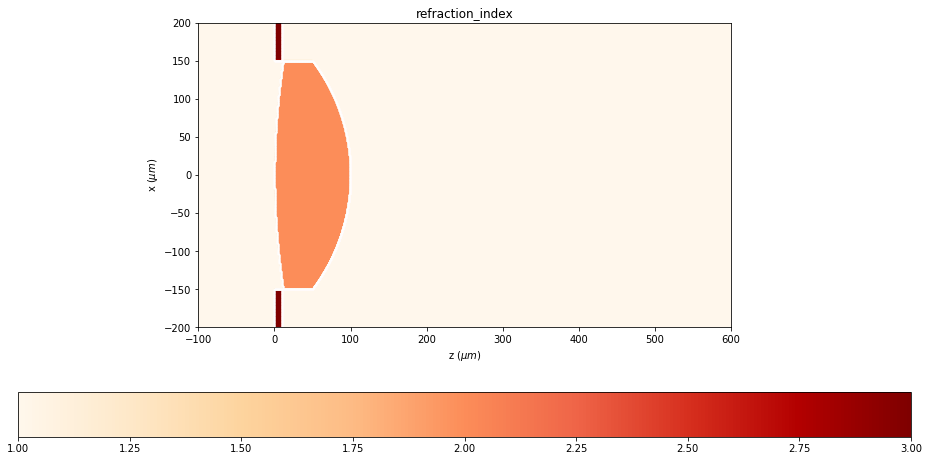

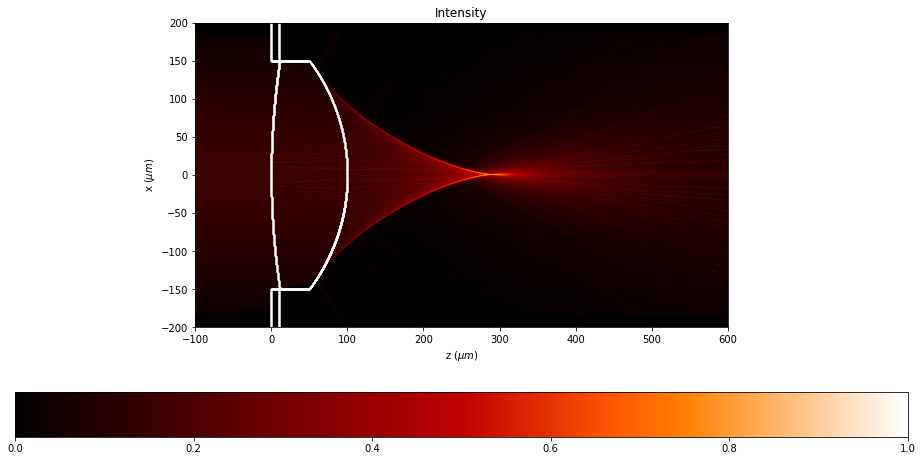

In [5]:
# WITH GOOD RESOLUTION
x0 = sp.linspace(-200 * um, 200 * um, 2048)
z0 = sp.linspace(-100 * um, 600 * um, 2048 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=200 * um, theta=0. * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal = u1.lens_convergent(
    r0=(0, 0),
    aperture=300 * um,
    radius=(1000 * um, -250 * um),
    thickness=100 * um,
    refraction_index=2,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))
u1.draw_refraction_index(scale='scaled')
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')
plt.show()

z=1000.0,-150.0
r=1000.0,-250.0


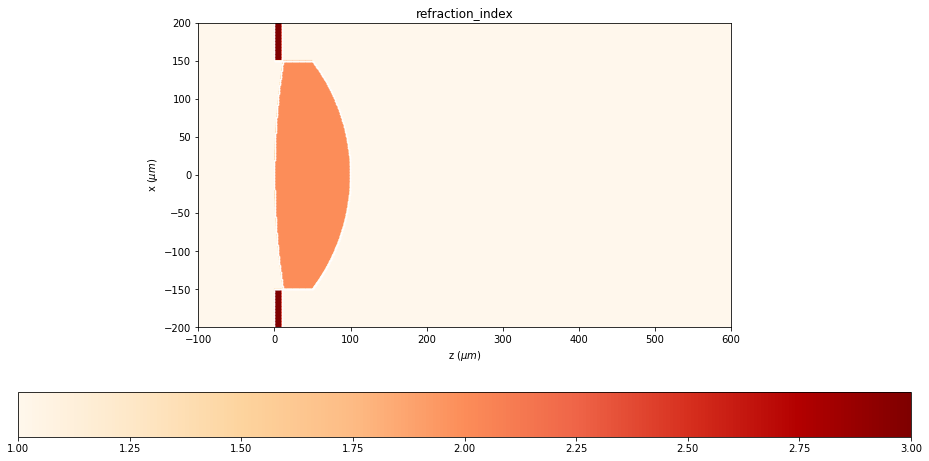

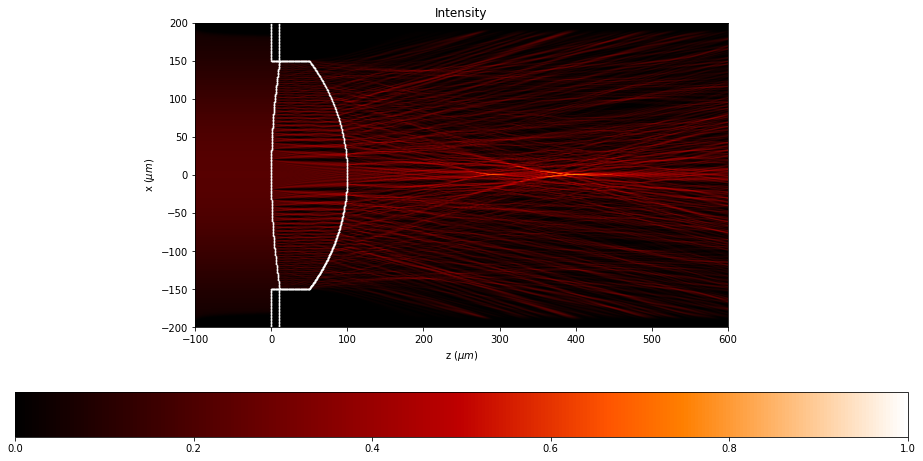

In [6]:
# WITH BAD RESOLUTION
x0 = sp.linspace(-200 * um, 200 * um, 512)
z0 = sp.linspace(-100 * um, 600 * um, 512 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=200 * um, theta=0. * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal = u1.lens_convergent(
    r0=(0, 0),
    aperture=300 * um,
    radius=(1000 * um, -250 * um),
    thickness=100 * um,
    refraction_index=2,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))
u1.draw_refraction_index(scale='scaled')
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')
plt.show()